In [13]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [14]:
def build_model(my_learning_rate):
    model=tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1, )))
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                 loss="mean_squared_error", 
                 metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

def train_model(model, feature, label, epochs, batch_size):
    history=model.fit(x=feature,
                     y=label,
                     batch_size=batch_size, 
                     epochs=epochs)
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]
    epochs=history.epoch
    hist=pd.DataFrame(history.history)
    rmse=hist["root_mean_squared_error"]
    return trained_weight, trained_bias, epochs, rmse
print("Defined create_model and train_model")

Defined create_model and train_model


In [15]:
def plot_the_model(trained_weight, trained_bias, feature, label):
    plt.xlabel("feature")
    plt.ylabel("label")
    plt.scatter(feature, label)
    x0=0
    y0=trained_bias
    x1=my_feature[-1]
    y1=trained_bias+(trained_weight*x1)
    plt.plot([x0, x1], [y0, y1], c="r")
    plt.show()
    
def plot_the_loss_curve(epochs, rmse):
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")
    plt.plot(epochs, rmse, label="Loss")
    plt.legend()
    plt.ylim([rmse.min()*0.97, rmse.max()])
    plt.show()
    
print("Defined plot_the_model and plot_the_loss_curve functions.")

Defined plot_the_model and plot_the_loss_curve functions.


In [16]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

Epoch 1/100
12/12 [==============================] - 0s 15ms/sample - loss: 158.9564 - root_mean_squared_error: 12.6078
Epoch 2/100
12/12 [==============================] - 0s 772us/sample - loss: 108.7002 - root_mean_squared_error: 10.4259
Epoch 3/100
12/12 [==============================] - 0s 957us/sample - loss: 79.4945 - root_mean_squared_error: 8.9160
Epoch 4/100
12/12 [==============================] - 0s 874us/sample - loss: 57.4514 - root_mean_squared_error: 7.5797
Epoch 5/100
12/12 [==============================] - 0s 936us/sample - loss: 44.1739 - root_mean_squared_error: 6.6463
Epoch 6/100
12/12 [==============================] - 0s 948us/sample - loss: 32.4477 - root_mean_squared_error: 5.6963
Epoch 7/100
12/12 [==============================] - 0s 916us/sample - loss: 24.1153 - root_mean_squared_error: 4.9107
Epoch 8/100
12/12 [==============================] - 0s 1ms/sample - loss: 16.9644 - root_mean_squared_error: 4.1188
Epoch 9/100
12/12 [============================

12/12 [==============================] - 0s 691us/sample - loss: 0.9324 - root_mean_squared_error: 0.9656
Epoch 71/100
12/12 [==============================] - 0s 843us/sample - loss: 0.9699 - root_mean_squared_error: 0.9848
Epoch 72/100
12/12 [==============================] - 0s 1ms/sample - loss: 0.9604 - root_mean_squared_error: 0.9800
Epoch 73/100
12/12 [==============================] - 0s 1ms/sample - loss: 0.9376 - root_mean_squared_error: 0.9683
Epoch 74/100
12/12 [==============================] - 0s 722us/sample - loss: 0.9877 - root_mean_squared_error: 0.9938
Epoch 75/100
12/12 [==============================] - 0s 1ms/sample - loss: 0.9101 - root_mean_squared_error: 0.9540
Epoch 76/100
12/12 [==============================] - 0s 840us/sample - loss: 0.9255 - root_mean_squared_error: 0.9620
Epoch 77/100
12/12 [==============================] - 0s 847us/sample - loss: 0.9812 - root_mean_squared_error: 0.9905
Epoch 78/100
12/12 [==============================] - 0s 891us/samp

e:\python 3.7.6\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


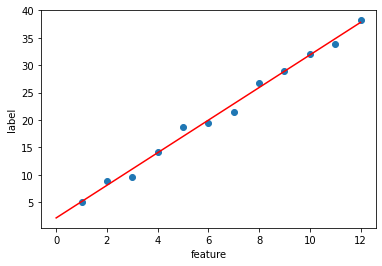

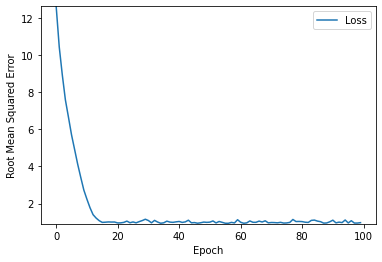

In [28]:
learning_rate=0.05
epochs=100
my_batch_size=5

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)